In [1]:
pip install sounddevice scipy numpy librosa tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import librosa
from keras.models import load_model
import os

# Load the saved model
model = load_model(r'C:\Users\KIIT\Desktop\speech-emotion-recognition-main\ipynb\train_model\emotion_speech_recognition_model_lstm.h5')  # Replace with your actual model path

# Emotion labels (edit if your model uses different labels or order)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

# Feature extraction function (same as in your notebook)
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Record live audio
def record_audio(filename="live_audio.wav", duration=3, fs=44100):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
    sd.wait()
    write(filename, fs, audio)
    print("Recording complete.")

# Predict emotion from audio
def predict_emotion(audio_path):
    features = feature_extract_mfcc(audio_path)
    features = features.reshape(1, 40, 1)
    predictions = model.predict(features)
    predicted_index = np.argmax(predictions)
    predicted_emotion = emotion_labels[predicted_index]
    print(f"Predicted Emotion: {predicted_emotion}")

# Run everything
record_audio()
predict_emotion("live_audio.wav")




Recording...
Recording complete.


C:\Users\KIIT\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


1/1 [==============================] - 0s 490ms/step
Predicted Emotion: disgust


🎙️ Speak now... (Recording for 5 seconds)
✅ Recording complete!


1/1 [==============================] - 1s 599ms/step

🎯 **Predicted Emotion:** `DISGUST`
  angry   : 0.38%
  disgust : 59.24%
  fear    : 12.90%
  happy   : 0.65%
  neutral : 25.68%
  ps      : 0.84%
  sad     : 0.30%


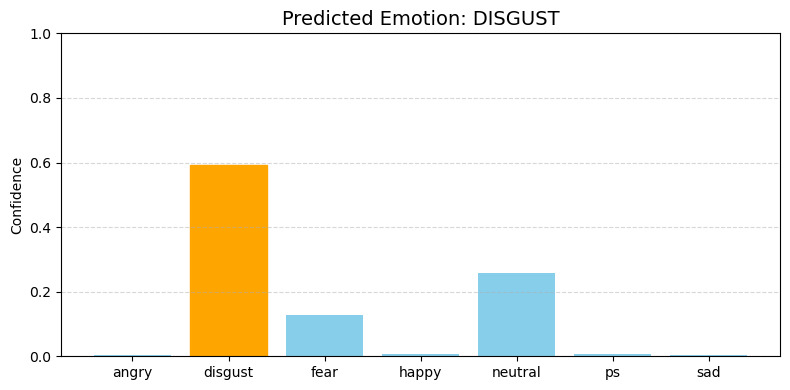

In [2]:
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import librosa
import matplotlib.pyplot as plt
from keras.models import load_model
import os
import IPython.display as ipd

# Load your trained model
model = load_model(r'C:\Users\KIIT\Desktop\speech-emotion-recognition-main\ipynb\train_model\emotion_speech_recognition_model_lstm.h5')  # Update path if needed

# Emotion labels used by the model
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

# Extract MFCC features
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Record audio
def record_audio(filename="live_audio.wav", duration=5, fs=44100):
    print("🎙️ Speak now... (Recording for 5 seconds)")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
    sd.wait()
    write(filename, fs, audio)
    print("✅ Recording complete!")
    return filename

# Predict and show result
def predict_emotion(audio_path):
    features = feature_extract_mfcc(audio_path)
    features = features.reshape(1, 40, 1)
    prediction = model.predict(features)[0]
    predicted_index = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_index]
    
    # Display results
    print(f"\n🎯 **Predicted Emotion:** `{predicted_emotion.upper()}`")
    for i, score in enumerate(prediction):
        print(f"  {emotion_labels[i]:<8}: {score*100:.2f}%")
    
    # Show bar chart
    plt.figure(figsize=(8, 4))
    bars = plt.bar(emotion_labels, prediction, color='skyblue')
    bars[predicted_index].set_color('orange')
    plt.title(f'Predicted Emotion: {predicted_emotion.upper()}', fontsize=14)
    plt.ylabel('Confidence')
    plt.ylim([0, 1])
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Run full pipeline
audio_file = record_audio()
ipd.display(ipd.Audio(audio_file))  # Playback
predict_emotion(audio_file)
